###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

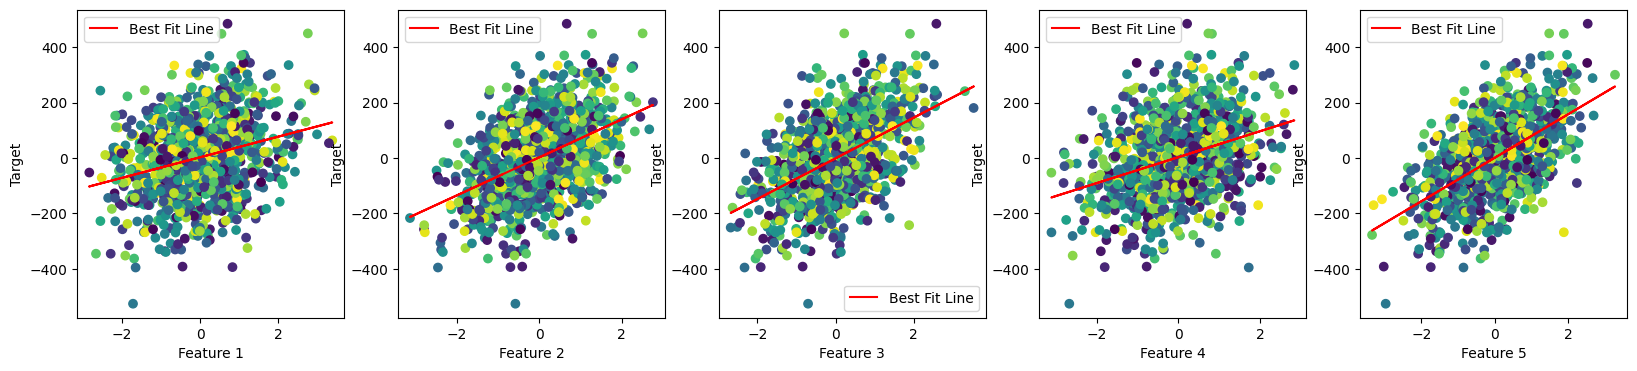

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression
x,y = mr(n_samples=1000,n_features=5)
#Let us give it a varying colored plot:
color = np.random.uniform(10,900,len(x))
fig,axs = plt.subplots(1,5,figsize=(20,4))


for i in range(5):
    axs[i].scatter(x[:,i],y,c=color)
    axs[i].set_xlabel(f"Feature {i+1}")
    axs[i].set_ylabel("Target")
    
    #for the best fit line 
    reg=LinearRegression().fit(x[:,i].reshape(-1,1),y)#reg is the LR model
    probable_target=reg.predict(x[:,i].reshape(-1,1))
    axs[i].plot(x[:,i],probable_target,color='red',label='Best Fit Line')
    axs[i].legend()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

Text(0, 0.5, 'Label')

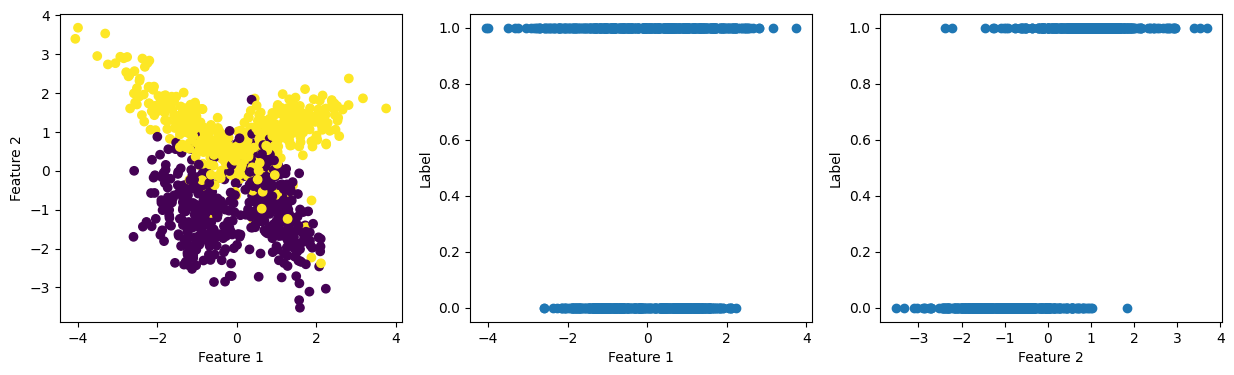

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
x,y = mc(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,n_informative=2)
#n_informative has to be 2 as n_classes*n_clusters_per_class >=2^n_informative
#and n_informative+n_redundant+n_repeated<=n_features
fig,axs=plt.subplots(1,3,figsize=(15,4))

axs[0].scatter(x[:,0],x[:,1],c=y)
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[1].scatter(x[:,0],y)
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Label")
axs[2].scatter(x[:,1],y)
axs[2].set_xlabel("Feature 2")
axs[2].set_ylabel("Label")
#it is clearly observed yellow corresponds to class y=1
#and purple to class y=0


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

Text(0, 0.5, 'Label')

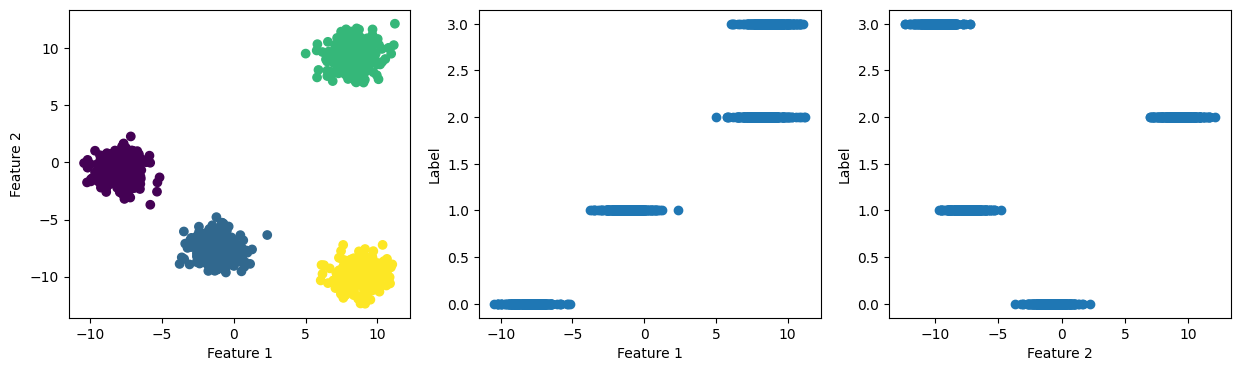

In [152]:
from sklearn.datasets import make_blobs as mb
x,y = mb(n_samples=1000,n_features=2,centers=4)
fig,axs=plt.subplots(1,3,figsize=(15,4))

axs[0].scatter(x[:,0],x[:,1],c=y)
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[1].scatter(x[:,0],y)
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Label")
axs[2].scatter(x[:,1],y)
axs[2].set_xlabel("Feature 2")
axs[2].set_ylabel("Label")

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [154]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.worldometers.info/coronavirus/"
page = req.get(url)
#print(page.status_code)
soup = BeautifulSoup(page.text,"lxml")
table = soup.find("table")
table
headings =[]
for i in table.find_all("th"):
    title = i.text
    headings.append(title)
headings[1]='Country'
headings[13]='Tests/1M pop'
headings[10]= 'Tot Cases/1M pop'
headings
df= pd.DataFrame(columns = headings)
df.head()
#extracting row data
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    data = [i.text for  i in row_data]
    length = len(df)
    df.loc[length] = data
#cleaning it up
df.drop(df.index[:8], inplace =True)
df.reset_index(inplace =True)
df.drop(df.index[231:239],inplace = True)
columns_to_keep=[x for x in range(22) if x in [2,3,4,5,6,7,8,9,15,16]]
df = df.iloc[:,columns_to_keep]
tmp =  df.iloc[:,8]
tmp1 = df.iloc[:,9]
df.drop('Population',axis=1, inplace =True)
df.drop('Continent',axis=1,inplace = True)
df.insert(1, 'Continent',tmp1)
df.insert(2, 'Population', tmp)
df

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,USA,North America,"334,805,269","107,041,325",,"1,164,340",,"105,064,981",,"812,004"
1,India,Asia,"1,406,631,776","44,986,461",,"531,832",,"44,446,514",,"8,115"
2,France,Europe,"65,584,518","40,054,863",,"167,052",,"39,823,190","+4,030","64,621"
3,Germany,Europe,"83,883,596","38,422,054",,"173,995",,"38,227,200",+300,"20,859"
4,Brazil,South America,"215,353,593","37,553,337",,"702,421",,"36,249,161",,"601,755"
...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,Europe,799,29,,,,29,,0
227,Western Sahara,Africa,"626,161",10,,1,,9,,0
228,MS Zaandam,,,9,,2,,7,,0
229,Tokelau,Australia/Oceania,"1,378",5,,,,,,5


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

imbalanced data: 
{0: 945, 1: 55}
after oversampling: 
{0: 945, 1: 248}
after undersampling: 
{0: 744, 1: 248}


Text(0.5, 1.0, 'UnderSampled Dataset')

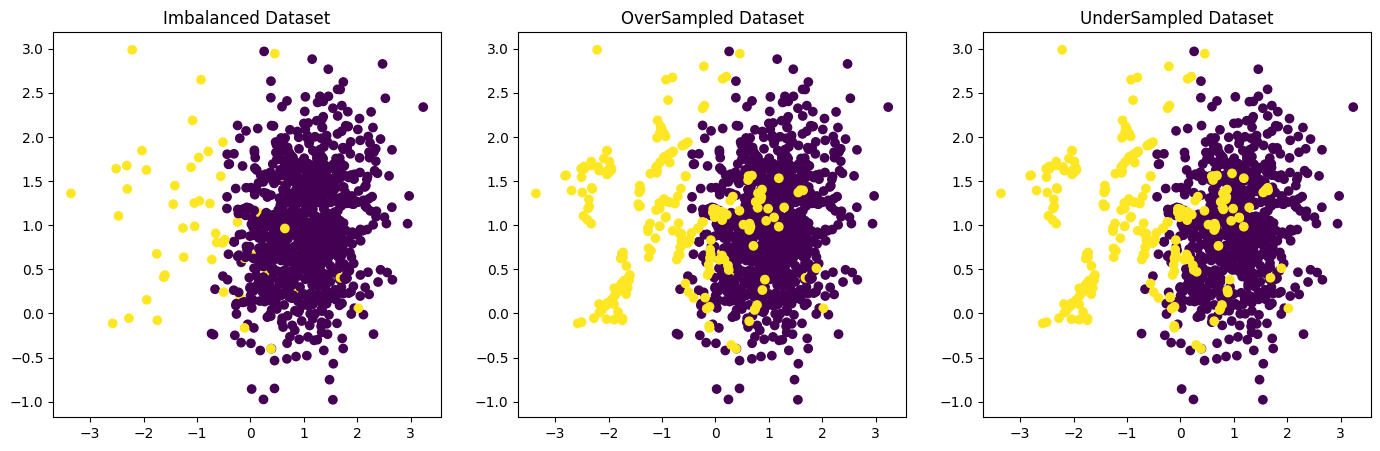

In [141]:

import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter as cnt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler as rus

#Generating an imbalanced classfification dataset
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2, n_clusters_per_class=1,n_informative=2,n_redundant=0,weights=(0.95,0.05))
fig,axs =  plt.subplots(1,3,figsize = (17,5))

#to verify the weights of classes
cnt={}
for i in y:
    if i in cnt:
        cnt[i]+=1
    else:
        cnt[i]=1
print('imbalanced data: ')
print(cnt)

#plotting the data 
axs[0].scatter(x[:,0],x[:,1],c=y)
axs[0].set_title('Imbalanced Dataset')

#oversampling:
oversample = SMOTE(sampling_strategy=0.2632)
x1,y1=oversample.fit_resample(x,y)

#verification:
cnt={}
for i in y1:
    if i in cnt:
        cnt[i]+=1
    else:
        cnt[i]=1
print('after oversampling: ')
print(cnt)

#plotting the data:
axs[1].scatter(x1[:,0],x1[:,1],c=y1)
axs[1].set_title('OverSampled Dataset')

#undersampling
undersample = rus(sampling_strategy=0.3333)
x2,y2=undersample.fit_resample(x1,y1)

#verification of size: 
cnt={}
for i in y2:
    if i in cnt:
        cnt[i]+=1
    else:
        cnt[i]=1
print('after undersampling: ')
print(cnt)

#plotting the undersampled data:
axs[2].scatter(x2[:,0],x2[:,1],c=y2)
axs[2].set_title('UnderSampled Dataset')

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [155]:
from sklearn.datasets import load_iris as li
import pandas as pd
X = li().data
y=li().target
df=pd.DataFrame(X,columns = li().feature_names)
print(df.head())
df.isna().sum()
print()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Dimensions of training set:")
print(X_train.shape)
print("Dimensions of testing set")
print(X_test.shape)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)
print()
print("First 5 rows of standardized training set: ")
print(X_train[:5,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dimensions of training set:
(105, 4)
Dimensions of testing set
(45, 4)

First 5 rows of standardized training set: 
[[-0.8140732   2.36232881 -1.28716935 -1.432395  ]
 [-1.31540861 -0.17816446 -1.34400399 -1.17082722]
 [ 1.06593456  0.51469734  1.09988567  1.18328283]
 [-0.5634055   0.74565127 -1.28716935 -1.04004333]
 [ 0.31393146 -0.17816446  0.47470459  0.26779559]]
